## Двухслойная нейронная сеть на numpy

In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
#iris_data = pd.read_csv("./Iris.csv")
iris = sns.load_dataset('iris')
iris_data = pd.DataFrame(iris)

print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
# g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['species'].replace(['setosa', 'virginica', 'versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)


iris_data.head(3)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [2]:
def ReLU(x):
  return x*(x  >  0)
def deriv_RELU(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

In [3]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


## 2 Слоя уменьшение скорости обучения при увеличение точности

In [4]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

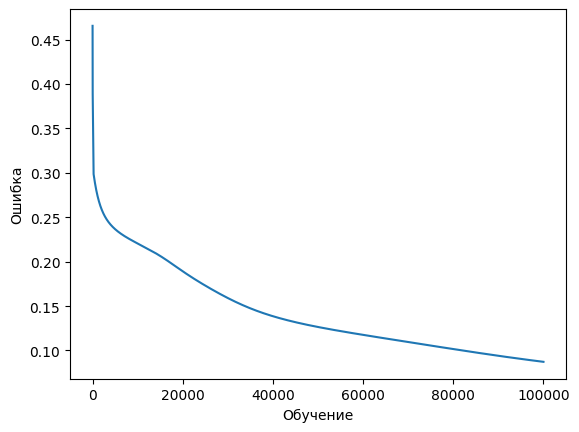

Точность нейронной сети 91.28%


In [5]:
# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    if accuracy >= 60.00:
      n=0.01
    if accuracy >= 70.00:
      n=0.001


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

## 3 слоя уменьшение скорости обучения в зависимости от от точности

In [11]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 5)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w2 = 2*np.random.random((5, 3))

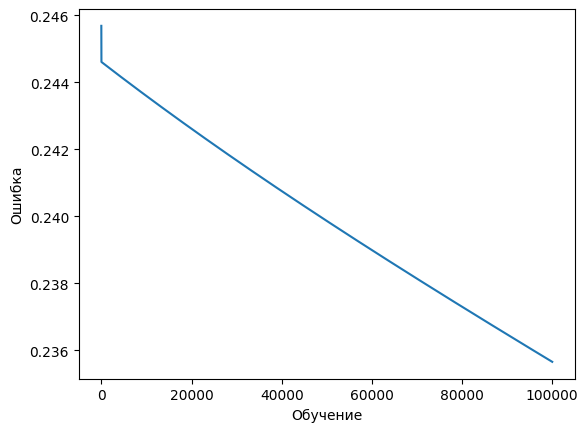

Точность нейронной сети 76.43%


In [17]:
# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer3 = sigmoid(np.dot(layer2, w2))
    #layer4 = sigmoid(np.dot(layer3, w3))

    # обратное распространение(back propagation) с использованием градиентного спуска
    #layer4_error = y_train - layer4
    #layer4_delta = layer4_error * sigmoid_deriv(layer4)

    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    if accuracy >= 50.00:
      n=0.001
    if accuracy >= 70.00:
      n=0.00001

### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

**Текст, выделенный полужирным шрифтом**## ReLU активация

In [18]:
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

эпоха 0, ошибка - 0.059156266547278825


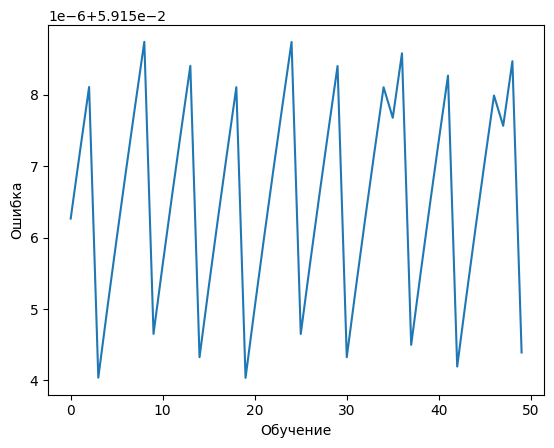

Точность нейронной сети 94.08%


In [45]:
# скорость обучения (learning rate)
n = 0.0001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(50): #100,000
    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = ReLU(np.dot(layer0, w0))
    layer2 = ReLU(np.dot(layer1, w1))

    #layer3 = ReLU(np.dot(layer2, w2))

    #layer3_error = y_train - layer3
    #layer3_delta = layer3_error * deriv_RELU(layer3)


    layer2_error = y_train - layer2
    layer2_delta = layer2_error * deriv_RELU(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * deriv_RELU(layer1)


    #w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    if i%100==0:
      print(f'эпоха {i}, ошибка - {error}')


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

## Градиентный спуск с моментом нестерова

<ipython-input-1-61344f7d0573>:39: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


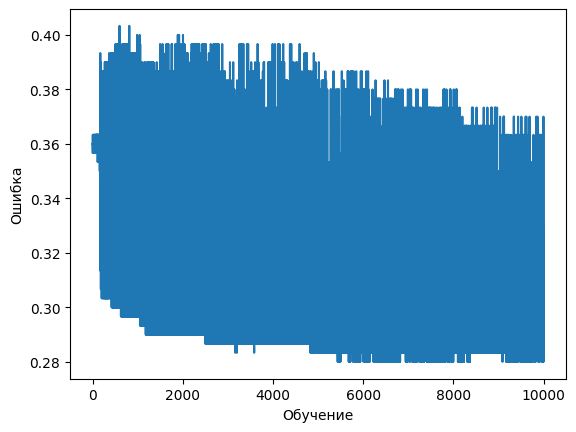

Точность нейронной сети 71.67%


In [48]:

# скорость обучения (learning rate)
n = 0.001
betta = 0.050
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += w1*betta+(layer1.T.dot(layer2_delta) - betta*w1)* n
    w0 += w0*betta+(layer0.T.dot(layer1_delta) - betta*w0)* n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100



### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Нейросети с 2 мя слоями достаточно для решения задачи ReLU активация показала наибольшую точность при меньшим количестве итерации (данная активаци уже начинается с оптимальной ошибки)